1. Imports

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


2. Loading and Preview Data

In [30]:

file_path = "C:/Users/dushi/maspeqa_projects/Linear-Regression-Model/Linear Regression/co2 Emission Africa.csv"
df = pd.read_csv(file_path)

df.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


3. Data Visualization


Dataset shape: (1134, 20)


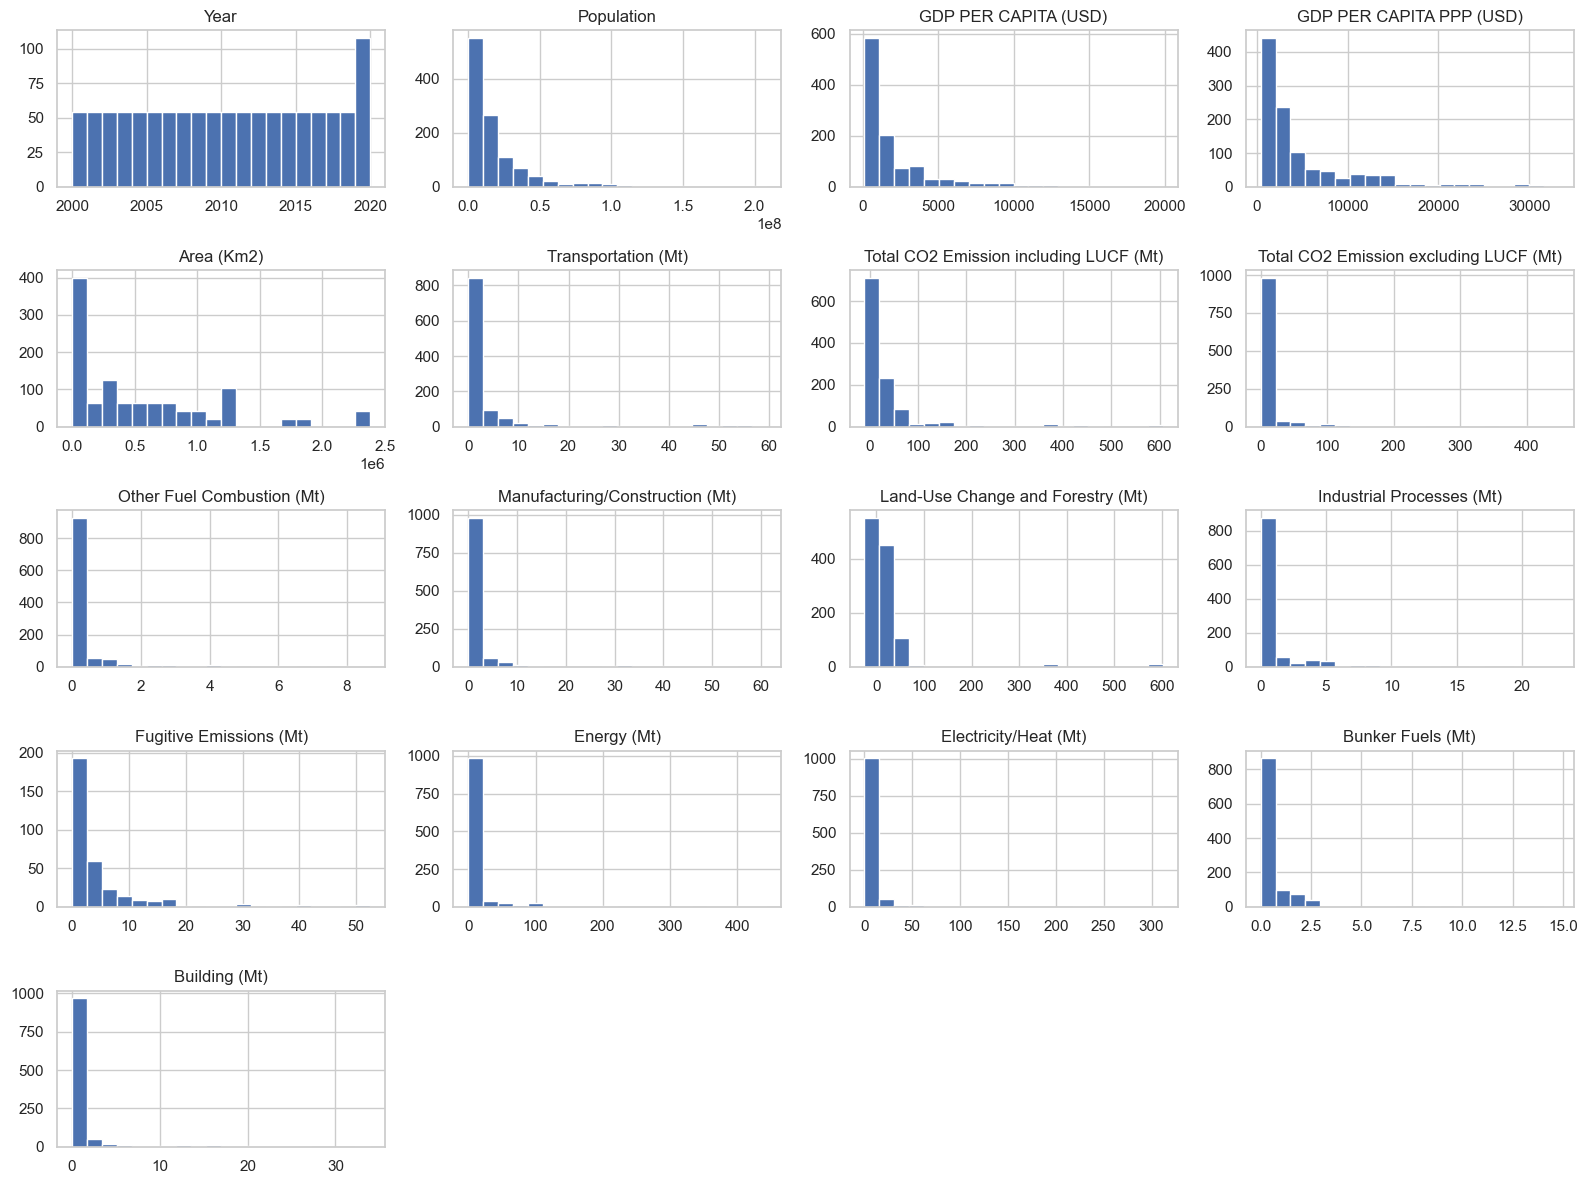

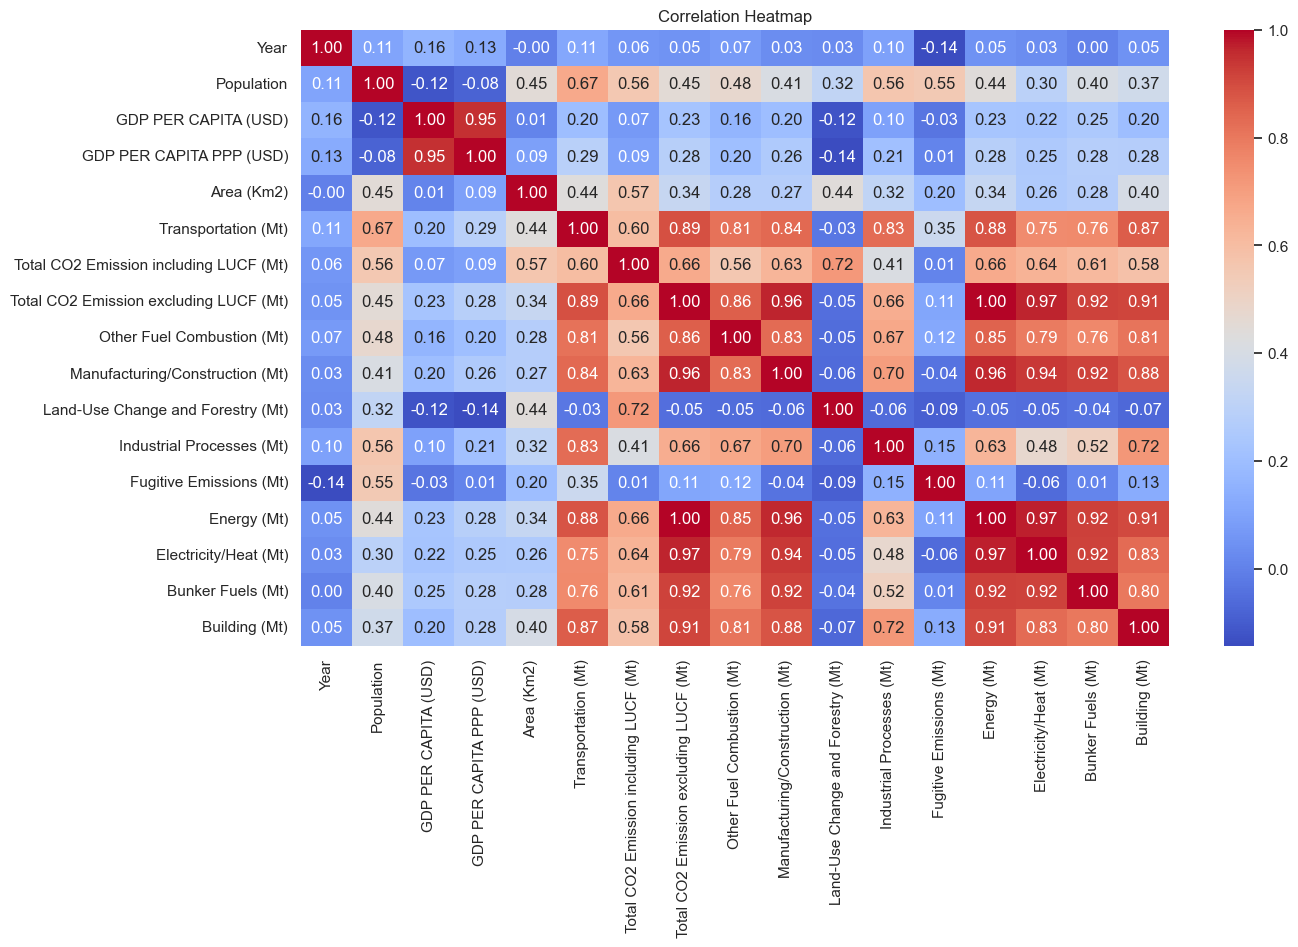

In [ ]:

# Dataset shape
print(f"Dataset shape: {df.shape}")

# Numeric feature distributions
df.select_dtypes(include=[np.number]).hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


4. Feature Engineering & Cleaning

In [32]:


to_drop = ['Country', 'Sub-Region', 'Code', 'Area (Km2)', 'Total CO2 Emission including LUCF (Mt)']
df_clean = df.drop(columns=to_drop)
df_clean = df_clean.dropna()

# Convert non-numeric columns (if any)
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
df_clean = df_clean.dropna()

# Print datatypes and check if all numeric now
print(df_clean.dtypes)


Year                                        int64
Population                                  int64
GDP PER CAPITA (USD)                      float64
GDP PER CAPITA PPP (USD)                  float64
Transportation (Mt)                       float64
Total CO2 Emission excluding LUCF (Mt)    float64
Other Fuel Combustion (Mt)                float64
Manufacturing/Construction (Mt)           float64
Land-Use Change and Forestry (Mt)         float64
Industrial Processes (Mt)                 float64
Fugitive Emissions (Mt)                   float64
Energy (Mt)                               float64
Electricity/Heat (Mt)                     float64
Bunker Fuels (Mt)                         float64
Building (Mt)                             float64
dtype: object


5. Train/Test Split & Standardization

In [34]:


target = 'Total CO2 Emission excluding LUCF (Mt)'
X = df_clean.drop(columns=[target])
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (264, 14), Test set: (66, 14)


6. Linear Regression Model (SGD/Gradient Descent)

c:\Users\dushi\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dushi\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dushi\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dushi\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\dushi\anaconda3\Lib\site-packages\sklearn\linea

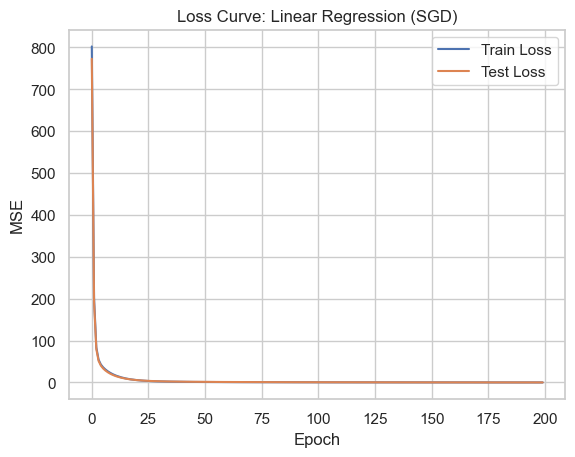

In [35]:


sgd = SGDRegressor(loss='squared_error', max_iter=1, learning_rate='invscaling', eta0=0.01, warm_start=True, random_state=42)
train_losses = []
test_losses = []
epochs = 200

for epoch in range(epochs):
    sgd.fit(X_train_scaled, y_train)
    y_train_pred = sgd.predict(X_train_scaled)
    y_test_pred = sgd.predict(X_test_scaled)
    train_losses.append(mean_squared_error(y_train, y_train_pred))
    test_losses.append(mean_squared_error(y_test, y_test_pred))

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Loss Curve: Linear Regression (SGD)')
plt.legend()
plt.show()


7. Compare Linear Regression, Decision Tree, Random Forest

In [36]:


# Fit all three models
linreg = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

linreg.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_lin = linreg.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# RMSE
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Linear Regression RMSE:", rmse_lin)
print("Decision Tree RMSE:", rmse_dt)
print("Random Forest RMSE:", rmse_rf)


Linear Regression RMSE: 0.002793195826877883
Decision Tree RMSE: 4.210528470394185
Random Forest RMSE: 2.590338545821693


8. Scatter Plot: Actual vs Predicted for All Models

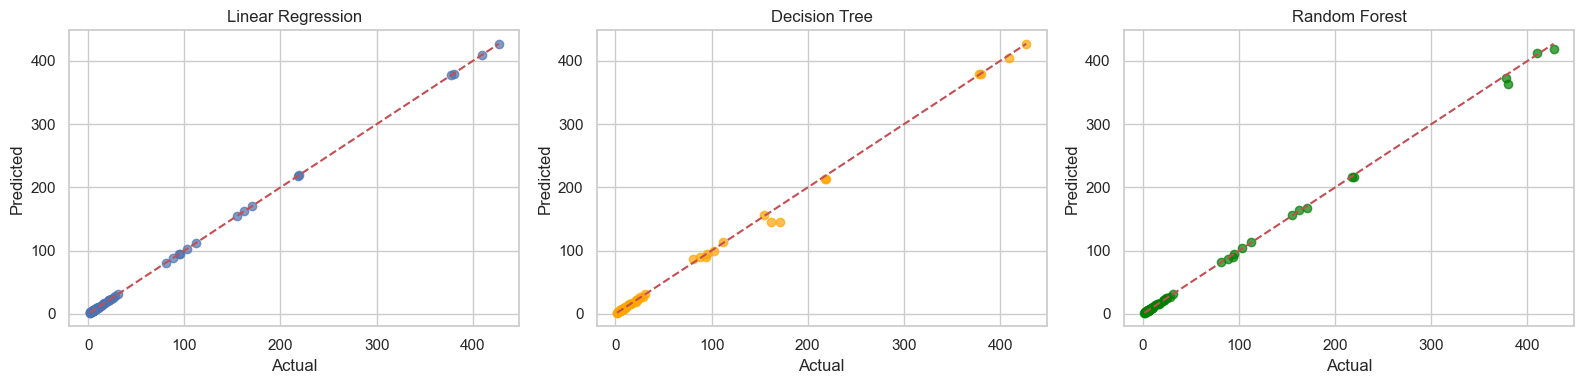

In [37]:


plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


 9. Feature Importance (for tree-based models)

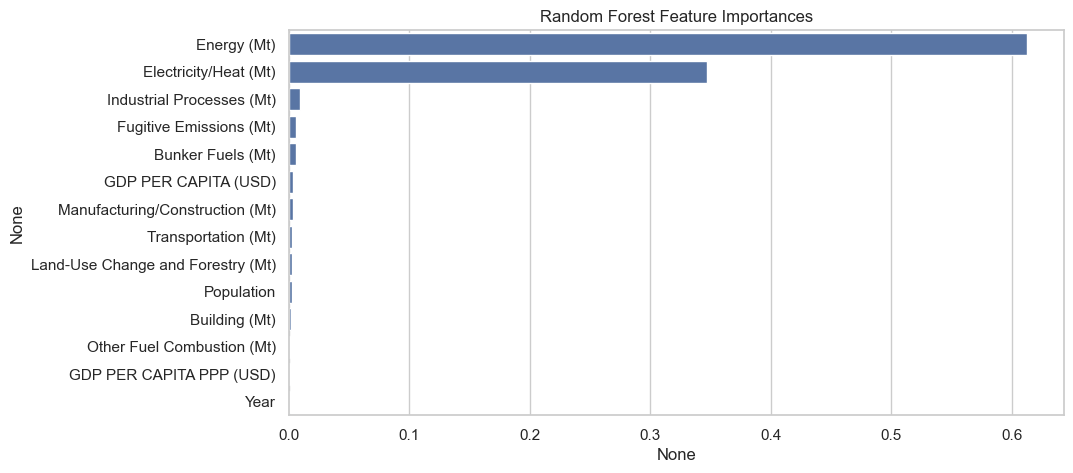

In [38]:


feat_names = X.columns

# Random Forest feature importance
rf_importances = pd.Series(rf.feature_importances_, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title('Random Forest Feature Importances')
plt.show()


10. Save the Best-Performing Model

In [39]:


best_model = None
if rmse_rf <= rmse_lin and rmse_rf <= rmse_dt:
    best_model = rf
    print('Random Forest is the best model!')
elif rmse_dt <= rmse_lin:
    best_model = dt
    print('Decision Tree is the best model!')
else:
    best_model = linreg
    print('Linear Regression is the best model!')

joblib.dump(best_model, 'best_co2_model.joblib')
joblib.dump(scaler, 'co2_scaler.joblib')


Linear Regression is the best model!


['co2_scaler.joblib']

In [40]:
# 11. Prediction Script for API/Task 2

import joblib
import pandas as pd

def predict_co2(features_dict):
    model = joblib.load('best_co2_model.joblib')
    scaler = joblib.load('co2_scaler.joblib')
    X_input = pd.DataFrame([features_dict])
    X_scaled = scaler.transform(X_input)
    prediction = model.predict(X_scaled)
    return prediction[0]

# Example usage:
sample_input = {col: X.iloc[0][col] for col in X.columns}
print("Sample prediction:", predict_co2(sample_input))


Sample prediction: 80.04911131884916
